# Project 3: Reddit

### Data Cleaning and EDA

In [287]:
import pandas as pd 
import matplotlib.pyplot as plt
import requests
import time
import re

**Read in both Violinist and Cello**

In [288]:
violinist_df = pd.read_csv('../data/Violinist.csv')
cello_df = pd.read_csv('../data/Cello.csv')

**Violinist dataframe cleaning and EDA**

In [289]:
violinist_df.head(3)

,Unnamed: 0,author_flair_text,created_utc,id,selftext,subreddit,title
0,0,Advanced,1623955275,o24eoj,[https://www.youtube.com/watch?v=PONbtxcPcKQ](...,violinist,"Ysaÿe violin concerto in E minor, the first mo..."
1,1,NaN,1623954118,o23xyv,I've been struggling with my vibrato and am lo...,violinist,Video performance examples with great vibrato
2,2,Adult Beginner,1623944890,o20e4w,My current rhythm exercise is in 6/8 time.\n\n...,violinist,Counting time (6/8)


**Drop Unnamed: 0 column**

In [290]:
violinist_df.drop('Unnamed: 0', axis=1, inplace=True)

**Rename the columns**

In [291]:
rename_columns_dict = {
    'id':'author_id',
    'created_utc' : 'posted_on',
    'author_flair_text': 'author_tag', 
    'title': 'post_title',
    'selftext':'post_description',
    'subreddit':'subreddit_name'}

In [292]:
violinist_df.rename(columns=rename_columns_dict, inplace=True) 

**Change column order**

In [293]:
# Moving the subreddit column to the end for the eventual merge with the Cello dataframe
# This will be the y_value
violinist_df = violinist_df[['author_id','posted_on','author_tag','post_title','post_description','subreddit_name']]

**Convert unix/epoch time to a regular time stamp in UTC**

In [294]:
#https://www.w3resource.com/python-exercises/pandas/time-series/pandas-time-series-exercise-17.php
violinist_df['posted_on']=pd.to_datetime(violinist_df['posted_on'], unit='s')
violinist_df.head(3)

,author_id,posted_on,author_tag,post_title,post_description,subreddit_name
0,o24eoj,2021-06-17 18:41:15,Advanced,"Ysaÿe violin concerto in E minor, the first mo...",[https://www.youtube.com/watch?v=PONbtxcPcKQ](...,violinist
1,o23xyv,2021-06-17 18:21:58,NaN,Video performance examples with great vibrato,I've been struggling with my vibrato and am lo...,violinist
2,o20e4w,2021-06-17 15:48:10,Adult Beginner,Counting time (6/8),My current rhythm exercise is in 6/8 time.\n\n...,violinist


**check data types**

In [295]:
violinist_df.dtypes

author_id                   object
posted_on           datetime64[ns]
author_tag                  object
post_title                  object
post_description            object
subreddit_name              object
dtype: object

<AxesSubplot:>

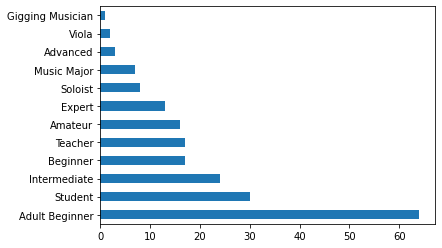

In [296]:
violinist_df['author_tag'].value_counts().plot(kind='barh')

**Cello dataframe cleaning and EDA**

In [297]:
cello_df.head(3)

,Unnamed: 0,author_flair_text,created_utc,id,selftext,subreddit,title
0,0,NaN,1623949192,o220ak,"Hey everyone,\n\nI was thinking of playing the...",Cello,Difficulty of Halvorsen Passacaglia
1,1,NaN,1623938843,o1y3l8,Hi all! I've been taking lessons for about a m...,Cello,Self care tips?
2,2,NaN,1623898632,o1mpqb,Long story short my beloved Cello is now Firew...,Cello,"About to Purchase Hidersine Vivente, Need Pers..."


**Drop Unnamed: 0 column**

In [298]:
cello_df.drop('Unnamed: 0', axis=1, inplace=True)

**Rename the columns**

In [299]:
rename_columns_dict = {
    'id':'author_id',
    'created_utc' : 'posted_on',
    'author_flair_text': 'author_tag', 
    'title': 'post_title',
    'selftext':'post_description',
    'subreddit':'subreddit_name'}

In [300]:
cello_df.rename(columns=rename_columns_dict, inplace=True) 

**Change column order**

In [301]:
# Moving the subreddit column to the end for the eventual merge with the Cello dataframe
# This will be the y_value
#['author_id','author_tag', 'created_time', 'post_text', 'post_title','post_tag','subreddit_name']
cello_df = cello_df[['author_id','posted_on','author_tag','post_title','post_description','subreddit_name']]

**Convert unix/epoch time to a regular time stamp in UTC**

In [302]:
cello_df['posted_on']=pd.to_datetime(cello_df['posted_on'], unit='s')
cello_df.head(3)

,author_id,posted_on,author_tag,post_title,post_description,subreddit_name
0,o220ak,2021-06-17 16:59:52,NaN,Difficulty of Halvorsen Passacaglia,"Hey everyone,\n\nI was thinking of playing the...",Cello
1,o1y3l8,2021-06-17 14:07:23,NaN,Self care tips?,Hi all! I've been taking lessons for about a m...,Cello
2,o1mpqb,2021-06-17 02:57:12,NaN,"About to Purchase Hidersine Vivente, Need Pers...",Long story short my beloved Cello is now Firew...,Cello


**check data types**

In [303]:
cello_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   author_id         1028 non-null   object        
 1   posted_on         1028 non-null   datetime64[ns]
 2   author_tag        51 non-null     object        
 3   post_title        1028 non-null   object        
 4   post_description  1028 non-null   object        
 5   subreddit_name    1028 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 48.3+ KB


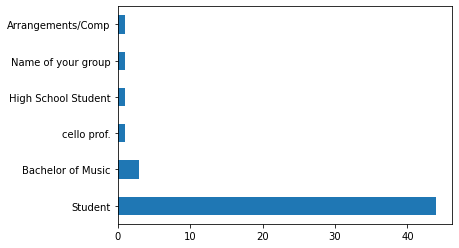

In [305]:
cello_df['author_tag'].value_counts().plot(kind='barh');

**Merge both dataframes**

In [306]:
reddit_data = pd.concat([violinist_df,cello_df])

In [307]:
reddit_data.head(3)

,author_id,posted_on,author_tag,post_title,post_description,subreddit_name
0,o24eoj,2021-06-17 18:41:15,Advanced,"Ysaÿe violin concerto in E minor, the first mo...",[https://www.youtube.com/watch?v=PONbtxcPcKQ](...,violinist
1,o23xyv,2021-06-17 18:21:58,NaN,Video performance examples with great vibrato,I've been struggling with my vibrato and am lo...,violinist
2,o20e4w,2021-06-17 15:48:10,Adult Beginner,Counting time (6/8),My current rhythm exercise is in 6/8 time.\n\n...,violinist


In [308]:
# Check shape of the dataframe
print(f'Shape of Reddit data  dataframe: {reddit_data.shape}')

Shape of Reddit data  dataframe: (2087, 6)


**check data types**

In [322]:
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 1027
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   author_id         2087 non-null   object        
 1   posted_on         2087 non-null   datetime64[ns]
 2   author_tag        253 non-null    object        
 3   post_title        2087 non-null   object        
 4   post_description  2087 non-null   object        
 5   subreddit_name    2087 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 114.1+ KB


**Binarize the subreddit column\
Violinist = 1 and Cello = 0**

In [309]:
reddit_data['subreddit_name'] = reddit_data['subreddit_name'].map(lambda x: 1 if x == 'violinist'else 0)

In [310]:
reddit_data.head(10)

,author_id,posted_on,author_tag,post_title,post_description,subreddit_name
0,o24eoj,2021-06-17 18:41:15,Advanced,"Ysaÿe violin concerto in E minor, the first mo...",[https://www.youtube.com/watch?v=PONbtxcPcKQ](...,1
1,o23xyv,2021-06-17 18:21:58,NaN,Video performance examples with great vibrato,I've been struggling with my vibrato and am lo...,1
2,o20e4w,2021-06-17 15:48:10,Adult Beginner,Counting time (6/8),My current rhythm exercise is in 6/8 time.\n\n...,1
3,o1vxwd,2021-06-17 12:22:01,NaN,I’m interested in picking up violin,"Hello everyone, as you can tell by the title I...",1
4,o1rmpe,2021-06-17 07:49:56,NaN,Question (as a beginner),"When the score says Sul G, Sul D, IVeme chord,...",1
5,o1nle1,2021-06-17 03:42:34,Expert,If you could change one thing about how you le...,"I mean anything ranging from posture, books, e...",1
6,o1mcaq,2021-06-17 02:37:58,Beginner,Time for new strings?,"I got my current violin in December, and idk i...",1
7,o1m1xq,2021-06-17 02:23:18,NaN,Success story,[removed],1
8,o1i0fi,2021-06-16 22:57:02,NaN,Trialing 1/2 size violins,My daughter (12) and I went to a luthier yeste...,1
9,o1fz34,2021-06-16 21:25:48,NaN,Violin out on trial: take to luthier?,I have a late 19th century workshop violin out...,1


**Removing special characters**

In [311]:
#https://stackoverflow.com/questions/56375850/how-to-remove-parentheses-from-string
#reddit_data['post_title'] = reddit_data['post_title'].map(lambda x: re.sub('[()]', '', x))

In [312]:
#reddit_data.head(3)

In [313]:
#reddit_data['post_title']  = reddit_data['post_title'].apply(lambda x: x.encode('ascii','ignore'))

In [314]:
#reddit_data.head(3)

In [315]:
# Setting tokenized words to a variable
tokenized_words = [x.split(' ') for x in reddit_data['post_title']]

In [316]:
tokenized_words[0][0]

'Ysaÿe'

In [317]:
# Import PortStemmer
from nltk.stem.porter import PorterStemmer

In [318]:
# Instantiate PortStemmer
stemmer = PorterStemmer()

In [319]:
stemmed_titles = []
for all_lists in tokenized_words:
    empty_list = []
    for word in all_lists:
        empty_list.append(re.sub("[()]", '', stemmer.stem(word)))
    stemmed_titles.append(empty_list)

In [320]:
joined_titles = []
for lists in stemmed_titles:
    joined_titles.append(' '.join(lists))

In [321]:
# Place new lists of stemmed words into the 'title' column in the final dataframe
reddit_data['post_title'] = joined_titles

# Check to see that the 'title' column is how it should look
reddit_data['post_title'].head(20)

0     ysaÿe violin concerto in e minor, the first mo...
1               video perform exampl with great vibrato
2                                        count time 6/8
3                        i’m interest in pick up violin
4                                 question a a beginner
5     if you could chang one thing about how you lea...
6                                 time for new strings?
7                                         success stori
8                                 trial 1/2 size violin
9                 violin out on trial: take to luthier?
10                                       bridg question
11                                        donat violin?
12                             how to becom music tutor
13                                      practic in heat
14    what the first thing you do when you pick up y...
15              what' a good way to improv your bowing?
16                    practic journal 07 - 13 june 2021
17        drone machin that allow multipl tone a